In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [5]:
das = pd.read_csv("../input/rainfall-in-india/rainfall in india 1901-2015.csv")
das = pd.DataFrame(das)
das.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [6]:
das = das.rename(columns = {'SUBDIVISION':'state', 'JAN': 'jan', 'FEB': 'feb', 'MAR': 'mar', 
                       'APR': 'apr' , 'MAY': 'may', 'JUN': 'jun', 'JUL': 'jul', 'AUG': 'aug', 'SEP': 'sep', 'OCT': 'oct'
                      , 'NOV': 'nov', 'DEC': 'dec', 'ANNUAL': 'annual', 'YEAR': 'year'})
das.tail()

,state,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


***I have changed the label of the rows as per my ease of operation***

In [14]:

das.state.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

***Unique values of the state are mentioned above***

In [8]:
das.year.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909])

In [17]:
das_kon = das[das.state=='KONKAN & GOA']
das_pun = das[das.state=='PUNJAB']
#das_pun.head()

,state,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1472,PUNJAB,1901,55.7,50.1,25.2,2.1,25.2,10.4,178.2,145.0,24.4,3.7,0.0,3.3,523.5,105.9,52.5,358.1,7.0
1473,PUNJAB,1902,0.0,0.8,9.9,10.9,29.6,49.9,125.6,94.9,67.2,9.0,0.0,0.1,398.0,0.8,50.4,337.7,9.1
1474,PUNJAB,1903,29.5,0.5,45.0,1.3,9.2,5.2,212.2,119.1,132.5,6.9,0.0,9.5,571.0,29.9,55.5,469.1,16.4
1475,PUNJAB,1904,24.2,1.7,87.8,1.2,13.8,22.0,59.9,124.0,73.8,7.4,9.8,25.9,451.5,25.9,102.9,279.7,43.1
1476,PUNJAB,1905,53.0,40.3,24.3,0.5,2.2,19.2,122.6,50.3,111.1,1.2,0.0,9.4,434.3,93.3,27.0,303.2,10.7


> ***I have created two specific data set one from KONKAN, and other for Kerla to process the data in further codes***

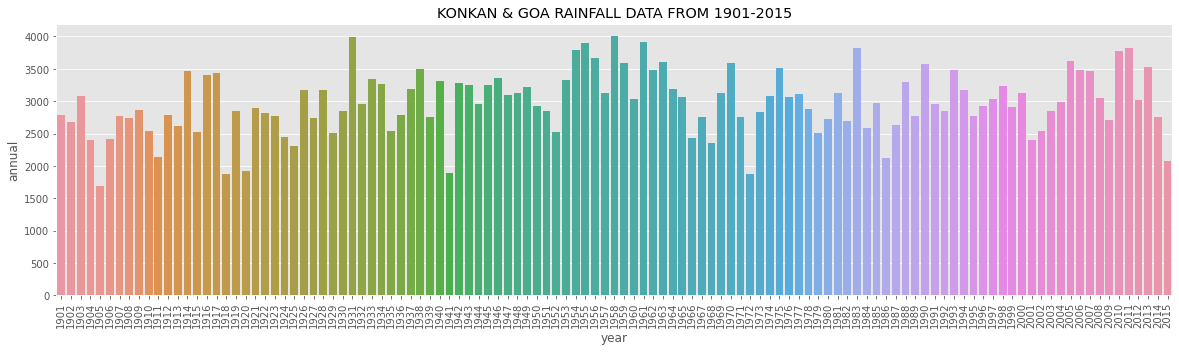

In [21]:
plt.figure(figsize = (20,5))
sns.barplot(x='year', y= 'annual', data = das_kon)
plt.xticks(rotation = 90)
plt.title('KONKAN & GOA RAINFALL DATA FROM 1901-2015')
plt.show()

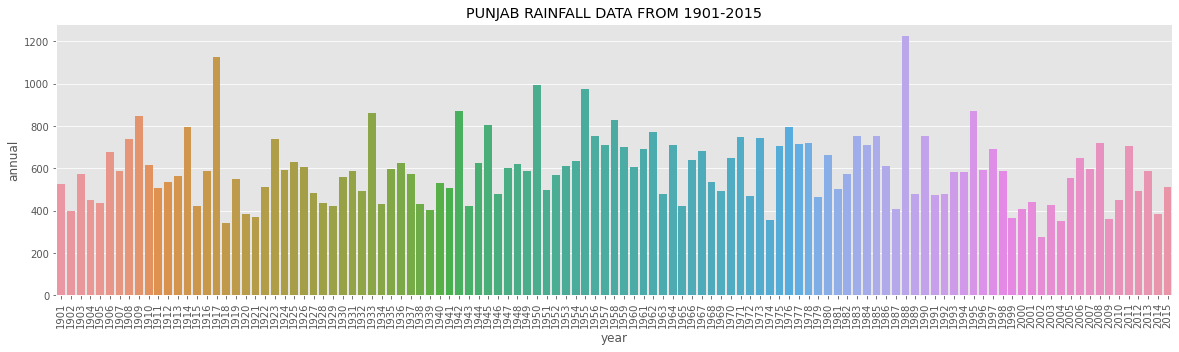

In [22]:
plt.figure(figsize = (20,5))
sns.barplot(x='year', y= 'annual', data = das_pun)
plt.xticks(rotation = 90)
plt.title('PUNJAB RAINFALL DATA FROM 1901-2015')
plt.show()

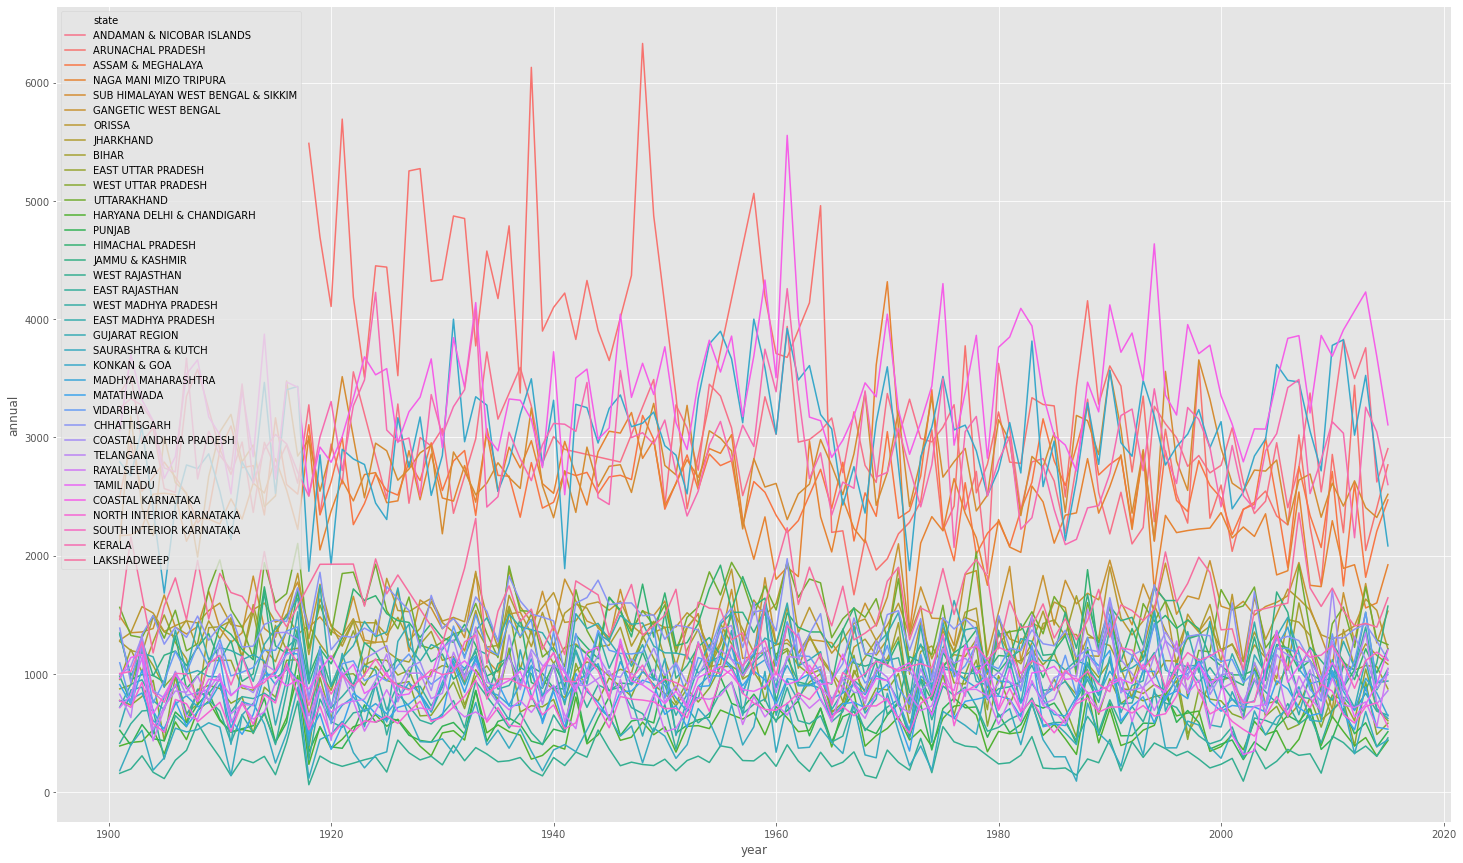

In [23]:
plt.figure(figsize=(25,15))
sns.lineplot(x = 'year', y= 'annual', hue = 'state', data = das)

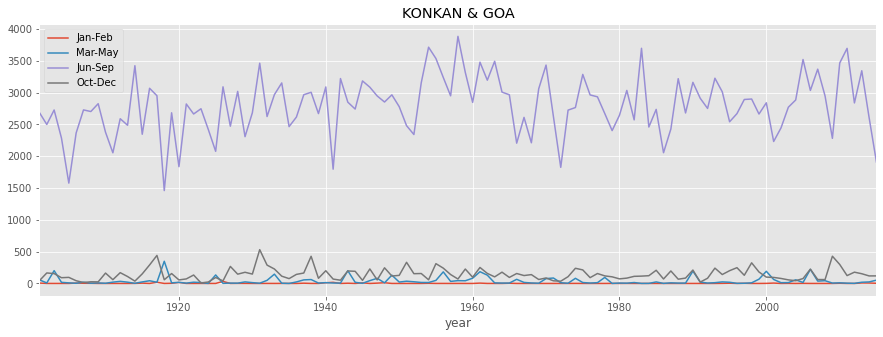

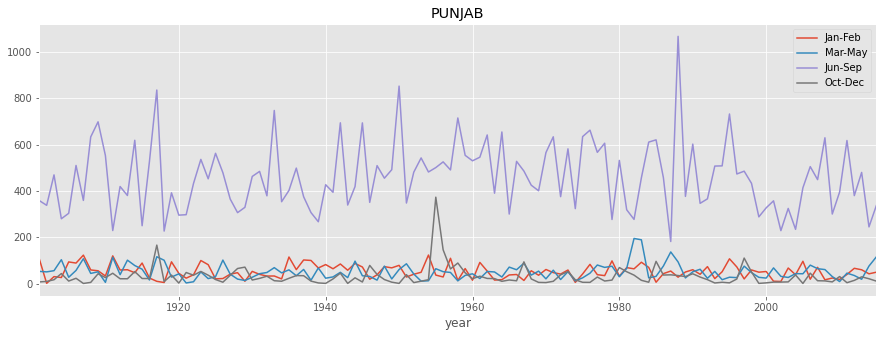

In [24]:
das_kon.groupby(['year'])['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'].sum().plot.line(figsize=(15,5))
plt.title('KONKAN & GOA')
das_pun.groupby(['year'])['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'].sum().plot.line(figsize=(15,5))
plt.title('PUNJAB')
plt.show()

***Above charts shows the rainfall data for two states ***

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text major ticklabel objects>)

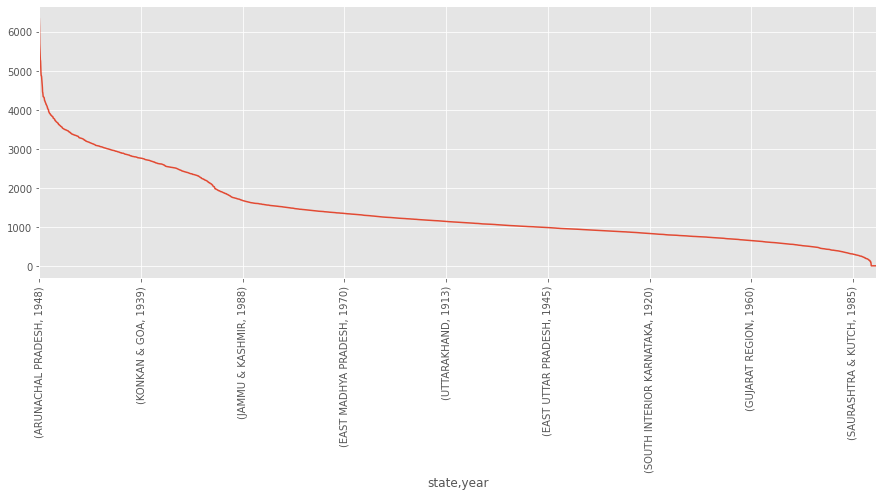

In [25]:
plt.figure(figsize=(15,5))
das.groupby(['state','year'])['annual'].sum().sort_values(ascending=False).plot()
plt.xticks(rotation=90)

***I have used groupby function and sorted the values in ascending order to create rainfall data***

***From the below code result and the chart above you can see that Arunachal Pradesh had highest rainfall in 1948, Coastal Karnataka had higest rainfall in 1961***

In [26]:
das.groupby(['state','year'])['annual'].sum().sort_values(ascending=False)

state                      year
ARUNACHAL PRADESH          1948    6331.1
                           1938    6129.0
                           1921    5691.4
COASTAL KARNATAKA          1961    5553.9
ARUNACHAL PRADESH          1918    5486.3
                                    ...  
COASTAL KARNATAKA          2012       0.0
JAMMU & KASHMIR            2009       0.0
ANDAMAN & NICOBAR ISLANDS  1932       0.0
                           1936       0.0
ARUNACHAL PRADESH          1950       0.0
Name: annual, Length: 4116, dtype: float64

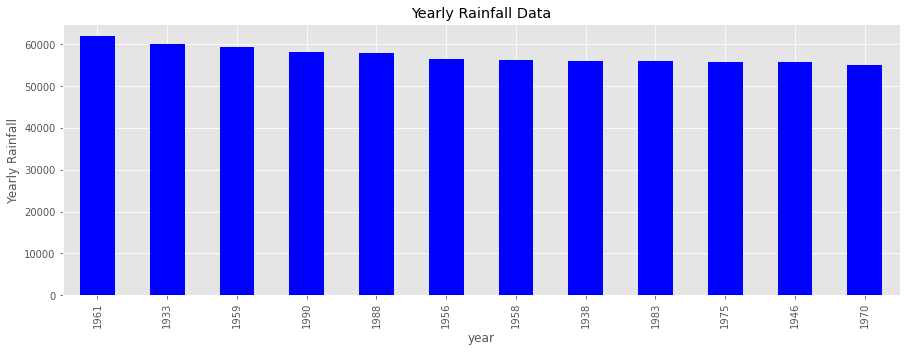

In [27]:
plt.figure(figsize=(15,5))
das.groupby(['year'])['annual'].sum().sort_values(ascending=False).head(12).plot(kind='bar', color = 'b')
plt.ylabel('Yearly Rainfall')
plt.title('Yearly Rainfall Data')
plt.show()

**Above chart shows you that in last 115 years 1961 was the year which had highest rainfall**

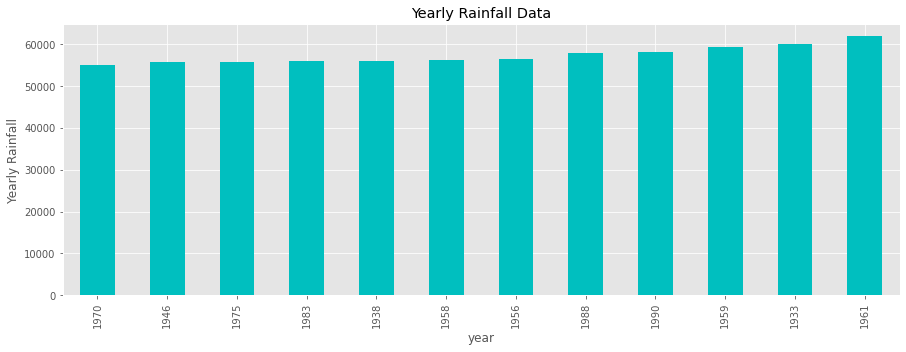

In [28]:
plt.figure(figsize=(15,5))
das.groupby(['year'])['annual'].sum().sort_values(ascending=True).tail(12).plot(kind='bar', color = 'c')
plt.ylabel('Yearly Rainfall')
plt.title('Yearly Rainfall Data')
plt.show()

***Above chart show that the year 1970 had lowest rainfall in last 115 years***

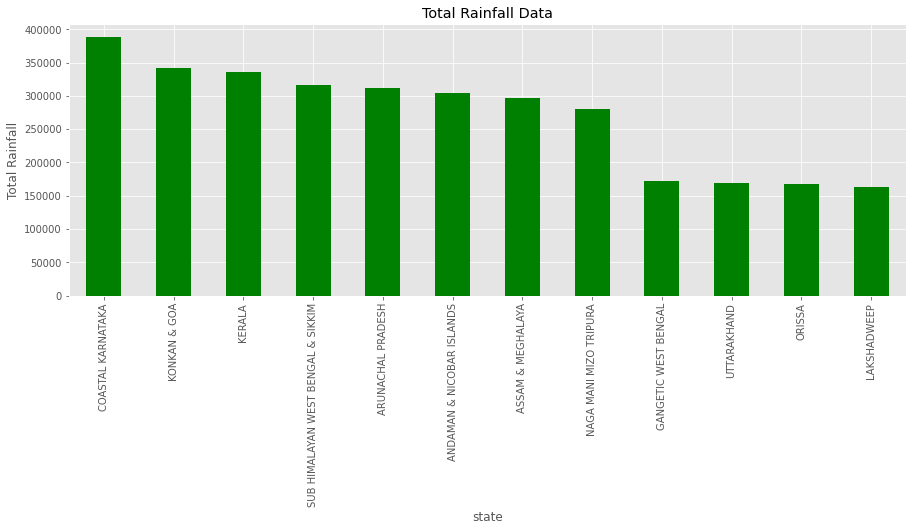

In [29]:
plt.figure(figsize=(15,5))
das.groupby(['state'])['annual'].sum().sort_values(ascending=False).head(12).plot(kind='bar', color = 'g')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall Data')
plt.show()

***Above chart shows that Costal Karnataka has received highest rainfall in last 115 years***

In [ ]:
plt.figure(figsize=(15,5))
das.groupby(['state'])['annual'].sum().sort_values(ascending=True).tail(10).plot(kind='bar', color = 'b')

plt.ylabel('Total Rainfall')
plt.title('Total Rainfall Data')
plt.show()

***Above chart shows that UTTARAKHAND has received lowest rainfall in last 115 years (This is beacuse UTTARAKHAND has been carved from UP in the year 2000, hence insufficient data )***

In [ ]:
plt.figure(figsize=(10,5))
das[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec']].mean().plot(kind= 'bar')
plt.xlabel('Months')
plt.ylabel('Avg. Rainfall')
plt.title('Avg. Monthly Rainfall Data')
plt.show()

***Above bar graph shows the average rainfall received from Jan-Dec in last 115 years.***